# Pete's day 2:
Today we are going to understand how preprocessing affects the prediction, how to measure the quality of our prediction and how to improve our simple classifier.

## Standarization
So far we haven't done any preprocesing on any feature. We are going to transform all numerical continuous variables into numbers with mean 0 and unit variance.

## Understanding how well or bad our classifier is
We are going to introduce the four possible combinations when working with data classification:
- True positives.
- True negatives.
- False positives.
- False negatives.

Then we will study the different measures based on builing statistics using some or all of these four valures.
We will understand measures like:
- Precision.
- Recall.
- Acuracy.
- Other measures like F1.

Finally we are going to get some plots to visualize this information.
We will plot the confusion matrix and the ROC curves.

Let's first read the data and import the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
path = "/data/nga/datos/"

In [3]:
names = ["Number of times pregnant",
         "glucose concentration",
         "blood pressure",
         "Triceps skin fold thickness",
         "2-Hour serum insulin",
         "Body mass index",
         "Diabetes pedigree function",
         "Age (years)",
         "Diabetes"
        ]

In [4]:
data = pd.read_csv(path+"pima-indians-diabetes.data",names=names)

In [5]:
data.head(n=5)

,Number of times pregnant,glucose concentration,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Working on standarization
Manipulation of the data is needed in some situations: When the data is oddly distributed, when all data points are really close and we want to perform some kind of decomposition, like PCA, etc. The normalization step is easy to implement in fact SK-learn library provides different funcitonalities: http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range

We can scale all features at the same time or just specific features.

In [6]:
from sklearn import preprocessing

We are going to use only features for prediction. Target variable (y) won't be scaled.

In [7]:
X = data.drop('Diabetes',axis=1)

In [8]:
y = data['Diabetes']

Let's do the scaling: mean 0 and std 1:

In [9]:
X_scaled = preprocessing.scale(X)

In [10]:
X_scaled.mean(axis=0)

array([ -6.47630098e-17,  -9.25185854e-18,   1.50342701e-17,
         1.00613962e-16,  -3.00685403e-17,   2.59052039e-16,
         2.45174251e-16,   1.93132547e-16])

In [11]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## Training and validation
Let's do a simple training with the same classifier and let's see if this preprocessing improved the classification. Then, we are going to study how our classifiers performs.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [13]:
cls = SVC()

In [14]:
cls.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
pred = cls.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test,pred)

In [17]:
print(accuracy)

0.733766233766


So, without any tunning in the classifier, just by scaling the input, we already got a 10% more accuracy.
But let's see how can we understand better the weak points in our classifier.
The wikipedia article explains this quite well: https://en.wikipedia.org/wiki/Precision_and_recall

![Precision and Recall](Precisionrecall.svg.png)
(By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283)
Luckily, we find these functions in SK-learn:
take a look at the documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [18]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [19]:
avg_precision = average_precision_score(y_test,pred)
recall = recall_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)

In [20]:
print("Average Precision - Recall: ",avg_precision)
print("Recall Score: ",recall)
print("Precision Score: ",precision)
print("F1 score: ",f1)

Average Precision - Recall:  0.519859307359
Recall Score:  0.563636363636
Precision Score:  0.645833333333
F1 score:  0.601941747573


Text(0.5,1,'2-class Precision-Recall curve: AP=0.52')

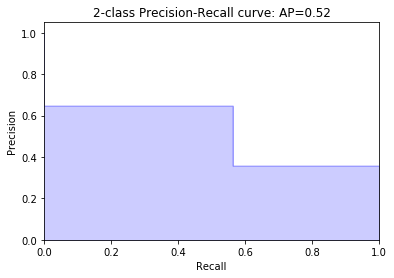

In [21]:
precision, recall, _ = precision_recall_curve(y_test, pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          avg_precision))

### Area under the curve

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In this case, we can clearly see that our classifier has medium precision (0.64) and worse recall (0.56). As a result the average of both is 0.51

But what does this mean? I thought we achieved a 71% of accuracy!
Yes indeed, but accuracy is defined as follows:
*Accuracy is also used as a statistical measure of how well a **binary classification test** correctly identifies or excludes a condition. That is, the accuracy is the proportion of **true results (both true positives and true negatives)** among the total number of cases examined.*

So our classifier seems to be doing well, but in fact is raising false positives and false negatives the 56% of the times.

What do we need to do?
Let's first try to understand better where the problem is. Then we will try to do some things to improve the accuracy.

In [22]:
from sklearn.metrics import roc_curve, auc

First we compute the False positive ratio and the True Positive ratio.

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [24]:
fpr

array([ 0.        ,  0.17171717,  1.        ])

In [25]:
tpr

array([ 0.        ,  0.56363636,  1.        ])

In [26]:
thresholds

array([2, 1, 0])

Then we calculate the auc curve based on the true and false positive ratios.

In [27]:
roc_auc = auc(fpr, tpr)

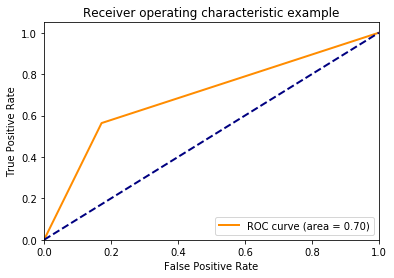

In [28]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The ROC curve is better when the area under the curve is always 1, that mean that the true positive ratio is one and the false positive ratio is cero.

### Confusion matrix
The next thing to plot is the **confusion matrix** this is useful in multiclass classification problems, but we will use it here to illustrate how it works.

First we will compute the matrix, using SK-learn functions and then we will use the library Seaborn to plot the heatmap:


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test,pred)

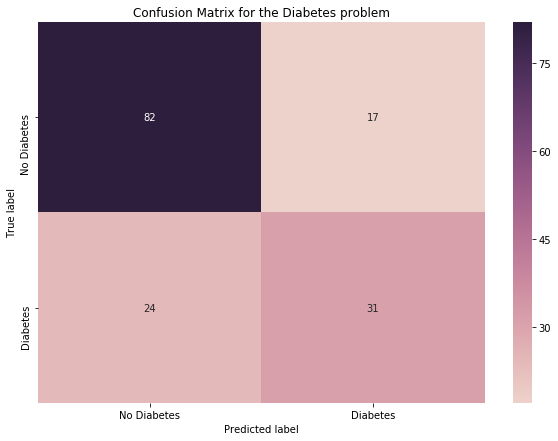

In [31]:
classes = ['No Diabetes', 'Diabetes']
df_cm = pd.DataFrame(cm,index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix for the Diabetes problem')
cmap = sns.cubehelix_palette(8, as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=cmap)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

This matrix help us understand our problems in the classification:
- It seems that is better predicted the absence of diabetes (87 times) than the presence of diabetes (37 times). So our true negatives are better than our true positives.
- The prediction of the true positives need to be improved.

The key question is then, How do we improve our classifier?
Next week we will take a look at how do we improve a classifier by explicitly telling it the class balance and doing some cross validation and hyperparameter search.